In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r "/content/drive/MyDrive/MMR" /content/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%bash
set -e
pip -q uninstall -y torch torchvision torchaudio || true
pip -q install --index-url https://download.pytorch.org/whl/cu121 \
  torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1
python - << 'PY'
import torch, platform
print("Python:", platform.python_version())
print("Torch:", torch.__version__)
print("CUDA build:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")
PY








     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 793.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 119.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 114.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%%bash
pip install psutil

In [ ]:
%%bash
set -e
cd /content

# Only clone if the directory doesn't exist
if [ ! -d "SurgicalToolSegmentation" ]; then
  echo "Cloning repository for the first time..."
  git clone [# Hi Hassna-Mohammed, put the Git's link there and run :)]
  cd SurgicalToolSegmentation

  # Apply our renaming changes here
  echo "Repository cloned. You need to apply the MMR_Segmentation changes manually."
else
  echo "Repository already exists. Skipping clone to preserve your changes."
  cd SurgicalToolSegmentation
fi

# Install the package (this will use your current local version)
pip -q install -e .

# Verify the new commands work
command -v mmr_create_dataset
command -v mmr_train_model
command -v mmr_infer

python - << 'PY'
import inspect, MMR_Segmentation
print("MMR_Segmentation package path:", inspect.getfile(MMR_Segmentation))
PY

In [ ]:
import os, glob, zipfile

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ROOT_DRIVE = "/content/drive/MyDrive/MMR_DATASET_(Seg_Dataset)"
OUT_LOCAL  = "/content"   # write result zips to local
N, M = 5, 2               # choose how many video zips to include

train_zips = sorted(glob.glob(os.path.join(ROOT_DRIVE,"Train","*.zip")))[:N]
test_zips  = sorted(glob.glob(os.path.join(ROOT_DRIVE,"Test","*.zip")))[:M]

TRAIN_MINI_ZIP = f"{OUT_LOCAL}/SAR_RARP50_TRAIN_MINI_{N}.zip"
TEST_MINI_ZIP  = f"{OUT_LOCAL}/SAR_RARP50_TEST_MINI_{M}.zip"

def make_master(zip_list, dest):
    if os.path.exists(dest): os.remove(dest)
    with zipfile.ZipFile(dest, "w", compression=zipfile.ZIP_STORED, allowZip64=True) as zf:
        for p in zip_list:
            zf.write(p, arcname=os.path.basename(p))

make_master(train_zips, TRAIN_MINI_ZIP)
make_master(test_zips,  TEST_MINI_ZIP)

print("Created local zips:")
!ls -lh "$TRAIN_MINI_ZIP" "$TEST_MINI_ZIP"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Created local zips:
-rw-r--r-- 1 root root 476M Sep 17 00:33 /content/SAR_RARP50_TEST_MINI_2.zip
-rw-r--r-- 1 root root 1.2G Sep 17 00:33 /content/SAR_RARP50_TRAIN_MINI_5.zip


In [ ]:
import zipfile
import os

# Check the contents of your ZIP files
zip_files_to_check = [
    "/content/SAR_RARP50_TRAIN_MINI_5.zip",
    "/content/SAR_RARP50_TEST_MINI_2.zip"
]

for zip_path in zip_files_to_check:
    if os.path.exists(zip_path):
        print(f"\nContents of {os.path.basename(zip_path)}:")
        with zipfile.ZipFile(zip_path, 'r') as zf:
            file_list = zf.namelist()
            for file in file_list[:10]:  # Show first 10 files
                print(f"  {file}")

            # Look specifically for video files
            video_files = [f for f in file_list if f.endswith('.avi')]
            print(f"  Video files found: {video_files}")
    else:
        print(f"ZIP file not found: {zip_path}")


Contents of SAR_RARP50_TRAIN_MINI_5.zip:
  video_01.zip
  video_02.zip
  video_03.zip
  video_04.zip
  video_05.zip
  Video files found: []

Contents of SAR_RARP50_TEST_MINI_2.zip:
  video_41.zip
  video_42.zip
  Video files found: []


In [ ]:
%%bash
set -e
TRAIN_MINI_ZIP="/content/SAR_RARP50_TRAIN_MINI_5.zip"
TEST_MINI_ZIP="/content/SAR_RARP50_TEST_MINI_2.zip"
OUT_TRAIN="/content/MMR_train_5"
OUT_TEST="/content/MMR_test_2"
N_CLASSES=9
PATCH="[512,640]"

rm -rf "$OUT_TRAIN" "$OUT_TEST"
mkdir -p "$OUT_TRAIN" "$OUT_TEST"

echo "[1/2] Converting TRAIN (5 videos) to Zarr..."
time mmr_create_dataset "$TRAIN_MINI_ZIP" "$OUT_TRAIN" $N_CLASSES "$PATCH"

echo "[2/2] Converting TEST (2 videos) to Zarr..."
time mmr_create_dataset "$TEST_MINI_ZIP" "$OUT_TEST"  $N_CLASSES "$PATCH"

echo
echo "[TRAIN Zarrs]"
ls -lh "$OUT_TRAIN/data" | sed -n '1,10p'
echo
echo "[TEST Zarrs]"
ls -lh "$OUT_TEST/data"  | sed -n '1,10p'

In [ ]:
import os, glob, json

# Create split configuration for your MMR dataset
DS = "/content/MMR_train_5"
z = sorted(glob.glob(os.path.join(DS,"data","*.zarr")))
print(f"Found {len(z)} Zarr files for training")

# Create train/validation split (4 train, 1 validation)
ids = [os.path.splitext(os.path.basename(p))[0] for p in z]
print(f"Dataset IDs: {ids}")

split = {
  "train": ids[:4],  # First 4 videos for training
  "val":   ids[4:],  # Last 1 video for validation
  "test":  []        # Test data is separate
}

# Save split configuration
sp = os.path.join(DS, "splits_train_val_test.json")
with open(sp, "w") as f:
    json.dump(split, f, indent=2)

print("Created split configuration:")
print(f"- Train: {len(split['train'])} videos")
print(f"- Val: {len(split['val'])} videos")
print(f"- Test: 0 videos (separate dataset)")
print(f"Saved to: {sp}")

Found 5 Zarr files for training
Dataset IDs: ['data_001', 'data_002', 'data_003', 'data_004', 'data_005']
Created split configuration:
- Train: 4 videos
- Val: 1 videos
- Test: 0 videos (separate dataset)
Saved to: /content/MMR_train_5/splits_train_val_test.json


In [ ]:
%%bash
set -e
OUT_TRAIN="/content/MMR_train_5"
RES="/content/MMR_results_train5_run1"
[ -d "$RES" ] && rm -rf "$RES"

mmr_train_model "$OUT_TRAIN" "$RES" "train-val-test" 9 "[512,640]" \
  -p --batch_size 2 --num_workers 4 --grad_accumulate_step 4 --val_plot_interval 4 --n_epochs 2

In [ ]:
from PIL import Image
import os, glob

RES="/content/MMR_results_train5_run1"

# View epoch plots (validation examples)
epoch_plots = sorted(glob.glob(os.path.join(RES, "plots", "epoch_*.png")))
if epoch_plots:
    print("Showing latest epoch plot:")
    display(Image.open(epoch_plots[-1]))

# View training dashboard
dashboard_path = os.path.join(RES, "plots", "training_dashboard.png")
if os.path.exists(dashboard_path):
    print("Training dashboard:")
    display(Image.open(dashboard_path))

# View loss curves
loss_path = os.path.join(RES, "plots", "loss.png")
if os.path.exists(loss_path):
    print("Loss curves:")
    display(Image.open(loss_path))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Processing data_001 frame 0...


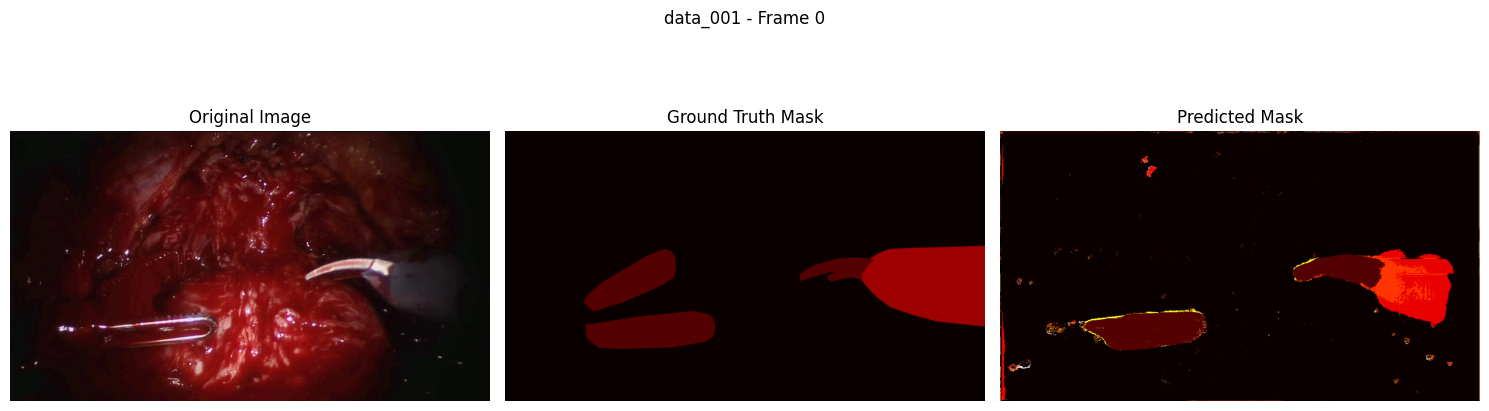

In [ ]:
import torch
import zarr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from segmentation_models_pytorch.encoders import get_preprocessing_fn
from monai.inferers import sliding_window_inference
import yaml

class CustomVisualizer:
    def __init__(self, results_path):
        self.results_path = results_path
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Load config
        config_path = os.path.join(results_path, 'config.yaml')
        with open(config_path, 'r') as f:
            self.config = yaml.safe_load(f)

        # Load model
        self.model = self._load_model()

        # Setup preprocessing
        self.preprocess_func = get_preprocessing_fn(
            self.config['model']['encoder_name'],
            pretrained=self.config['model']['encoder_weights']
        )

    def _load_model(self):
        import segmentation_models_pytorch as smp

        # Create model
        model = smp.create_model(**self.config['model']).to(self.device)

        # Load weights
        model_path = os.path.join(self.results_path, 'checkpoints', 'best_model.pth')
        checkpoint = torch.load(model_path, weights_only=False)
        model.load_state_dict(checkpoint['network_state_dict'])
        model.eval()

        return model

    def load_frame(self, zarr_path, frame_idx):
        """Load a specific frame from zarr file"""
        zg = zarr.open_group(zarr_path, mode='r')

        # Handle the format: images (C, T, H, W), masks (T, H, W)
        if len(zg['image'].shape) == 4 and zg['image'].shape[0] == 3:  # (C, T, H, W)
            # Get all channels for the specific frame
            image = zg['image'][:, frame_idx, :, :]  # Shape: (3, H, W)
            mask = zg['mask'][frame_idx, :, :]       # Shape: (H, W)

            # Convert from (C, H, W) to (H, W, C) for visualization
            image = np.transpose(image, (1, 2, 0))  # Now (H, W, C)

        else:
            raise ValueError(f"Unexpected data format - image shape: {zg['image'].shape}")

        # Ensure image is in proper format (H, W, C) and proper data type
        if image.dtype != np.uint8:
            # Convert from float32 to uint8 if needed
            if image.max() <= 1.0:
                image = (image * 255).astype(np.uint8)
            else:
                image = image.astype(np.uint8)

        return image, mask

    def predict_frame(self, image):
        """Run model prediction on a single frame"""
        # Preprocess
        if self.preprocess_func:
            image_preprocessed = self.preprocess_func(image)
        else:
            image_preprocessed = image.astype(np.float32) / 255.0

        # Convert to tensor
        image_tensor = torch.from_numpy(image_preprocessed).permute(2, 0, 1).unsqueeze(0)
        image_tensor = image_tensor.to(self.device, dtype=torch.float32)

        # Predict using sliding window
        with torch.no_grad():
            prediction = sliding_window_inference(
                image_tensor,
                roi_size=self.config['transformations']['patch_size'],
                sw_batch_size=2,
                predictor=self.model,
                overlap=0.25,
                sw_device=self.device,
                device=self.device
            )

        # Convert to numpy
        prediction = prediction.argmax(1).cpu().numpy()[0]
        return prediction

    def plot_comparison(self, image, mask, prediction, title="Segmentation Results"):
        """Plot original image, ground truth mask, and prediction"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Original image
        axes[0].imshow(image)
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        # Ground truth mask
        axes[1].imshow(mask, cmap='hot', vmin=0, vmax=self.config['n_classes'])
        axes[1].set_title('Ground Truth Mask')
        axes[1].axis('off')

        # Prediction
        axes[2].imshow(prediction, cmap='hot', vmin=0, vmax=self.config['n_classes'])
        axes[2].set_title('Predicted Mask')
        axes[2].axis('off')

        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

    def visualize_test_frames(self, test_data_path, video_name, frame_indices):
        """Visualize specific frames from test data"""
        zarr_path = os.path.join(test_data_path, 'data', f'{video_name}.zarr')

        for frame_idx in frame_indices:
            print(f"Processing {video_name} frame {frame_idx}...")

            # Load frame
            image, mask = self.load_frame(zarr_path, frame_idx)

            # Predict
            prediction = self.predict_frame(image)

            # Plot
            title = f"{video_name} - Frame {frame_idx}"
            self.plot_comparison(image, mask, prediction, title)

# Test the visualizer
results_path = "/content/MMR_results_train5_run1"
visualizer = CustomVisualizer(results_path)

# Try just one frame from test data
test_data_path = "/content/MMR_test_2"
visualizer.visualize_test_frames(
    test_data_path,
    'data_001',
    frame_indices=[0]  # Just frame 0 to start
)

Processing data_001 frame 0...


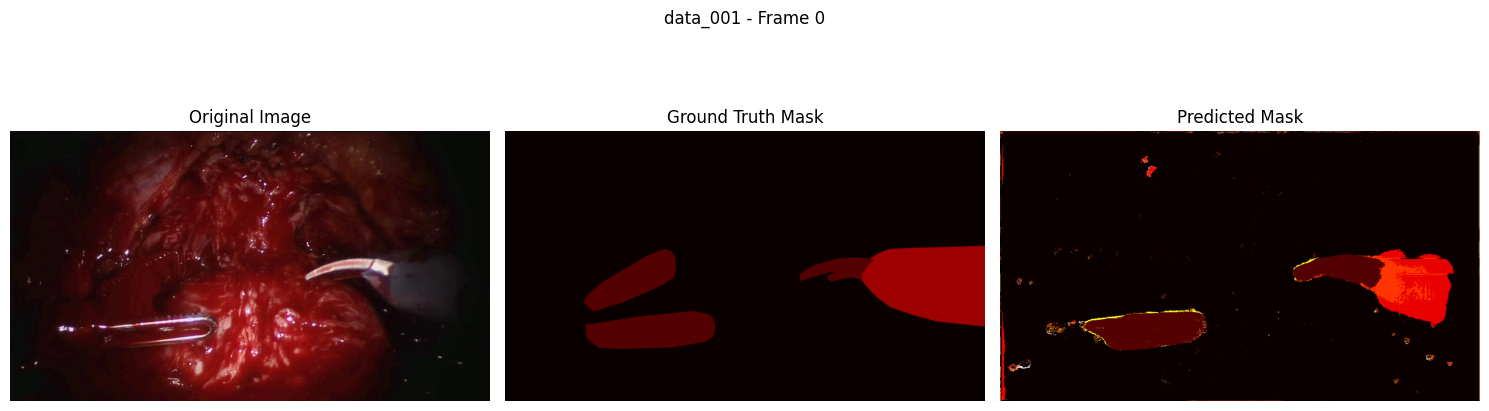

In [ ]:
# Test the corrected visualizer
results_path = "/content/MMR_results_train5_run1"
visualizer = CustomVisualizer(results_path)

# Try just one frame from test data
test_data_path = "/content/MMR_test_2"
visualizer.visualize_test_frames(
    test_data_path,
    'data_001',
    frame_indices=[0]  # Just frame 0 to start
)

In [ ]:
# Try multiple frames
visualizer.visualize_test_frames(
    test_data_path,
    'data_001',
    frame_indices=[0, 20, 40]  # Multiple frames
)

# And from the other test video
visualizer.visualize_test_frames(
    test_data_path,
    'data_002',  # Changed to data_002 since you have 2 test videos
    frame_indices=[0, 20, 40]
)